In [3]:
import pandas as pd
df = pd.read_csv('/content/sample_data/customer_shopping_data.csv')
print(df.head())

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  


##**1. What is the total revenue generated by each product category?**

In [4]:
import pandas as pd

# Assuming 'df' is the DataFrame from the previous cell
# Changed tuple to list for selecting multiple columns
total_revenue_by_category = df.groupby('category')[['quantity', 'price']].apply(lambda x: (x['quantity'] * x['price']).sum())
print(total_revenue_by_category)


category
Books              8.345529e+05
Clothing           1.139968e+08
Cosmetics          6.792863e+06
Food & Beverage    8.495351e+05
Shoes              6.655345e+07
Souvenir           6.358247e+05
Technology         5.786235e+07
Toys               3.980426e+06
dtype: float64


##**2.What is the average revenue per order?**

In [9]:
import pandas as pd

# Assuming 'df' is the DataFrame from the previous cell
# Access the 'total_revenue' column of the 'df' DataFrame
average_revenue_per_order = df['price'].mean()
print(average_revenue_per_order)

689.2563209226097


##**3. Which regions or locations contribute the most to total sales?**

In [15]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the necessary data
# Replace 'df' with the actual name of your DataFrame if it's different
total_revenue_by_region = df.groupby('shopping_mall')['total_revenue'].sum()
print(total_revenue_by_region)

shopping_mall
Cevahir AVM          12645138.20
Emaar Square Mall    12406100.29
Forum Istanbul       12303921.24
Istinye Park         24618827.68
Kanyon               50554231.10
Mall of Istanbul     50872481.68
Metrocity            37302787.33
Metropol AVM         25379913.19
Viaport Outlet       12521339.72
Zorlu Center         12901053.82
Name: total_revenue, dtype: float64


##**4. What percentage of total revenue comes from each product category?**

In [17]:
import pandas as pd
category_revenue_percentage = (total_revenue_by_category / total_revenue_by_category.sum()) * 100
print(category_revenue_percentage)

category
Books               0.331823
Clothing           45.325712
Cosmetics           2.700877
Food & Beverage     0.337780
Shoes              26.461995
Souvenir            0.252807
Technology         23.006369
Toys                1.582638
dtype: float64


##**5. Who are the top 10 highest-spending customers**

In [18]:
import pandas as pd
top_customers = df.groupby('customer_id')['total_revenue'].sum().sort_values(ascending=False)
print(top_customers.head(10))

customer_id
C137763    26250.0
C699580    26250.0
C110600    26250.0
C110625    26250.0
C211345    26250.0
C139344    26250.0
C700083    26250.0
C291511    26250.0
C291627    26250.0
C164347    26250.0
Name: total_revenue, dtype: float64


##**6. What is the average number of items per order?**

In [19]:
import pandas as pd
average_items_per_order = df['quantity'].mean()
print(average_items_per_order)

3.003428617392441


##**7. Which product categories have the highest profit margins?**

In [23]:
import pandas as pd
df['profit_margin'] = (df['total_revenue'] - df['price']) / df['total_revenue'] * 100
highest_margin_categories = df.groupby('category')['profit_margin'].mean().sort_values(ascending=False)
print(highest_margin_categories)

category
Shoes              54.707993
Cosmetics          54.557197
Toys               54.533558
Technology         54.527956
Books              54.469317
Clothing           54.421714
Food & Beverage    54.164636
Souvenir           53.912783
Name: profit_margin, dtype: float64


##**8.Which category have the highest sales-to-price ratio?**

In [30]:
import pandas as pd
sales_to_price_ratio = df.groupby('category').apply(lambda x: x['quantity'].sum() / x['price'].mean()).sort_values(ascending=False)
print(sales_to_price_ratio.head(10))


category
Food & Beverage    2825.239006
Souvenir            426.172208
Cosmetics           371.298574
Books               328.778878
Toys                281.445312
Clothing            114.926020
Shoes                16.718596
Technology            4.758095
dtype: float64


<ipython-input-30-97559df49464>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sales_to_price_ratio = df.groupby('category').apply(lambda x: x['quantity'].sum() / x['price'].mean()).sort_values(ascending=False)


##**9.What is the customer lifetime value (CLV) for each customer?**

In [31]:
import pandas as pd
clv = df.groupby('customer_id')['total_revenue'].sum()  # Assuming 'revenue' is the measure for lifetime value
print(clv.head(10))  # Top 10 customers by lifetime value


customer_id
C100004    7502.00
C100005    2400.68
C100006     322.56
C100012     130.75
C100019      35.84
C100025     143.36
C100028      15.15
C100030    4801.28
C100034    1200.32
C100041    2700.72
Name: total_revenue, dtype: float64


##**10.What is the most profitable product category?**

In [34]:
df['total_profit'] = df['total_revenue'] - df['price']
total_profit_by_category = df.groupby('category')['total_profit'].sum().sort_values(ascending=False)
print(total_profit_by_category)


category
Clothing           82921106.40
Shoes              48418114.58
Technology         42090300.00
Cosmetics           4944256.00
Toys                2893721.60
Food & Beverage      617966.34
Books                607575.60
Souvenir             461387.82
Name: total_profit, dtype: float64


##**GRAPHS:**

##**1.Bar Chart: Total Revenue by Product Category**

<ipython-input-38-14631a7bdb69>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

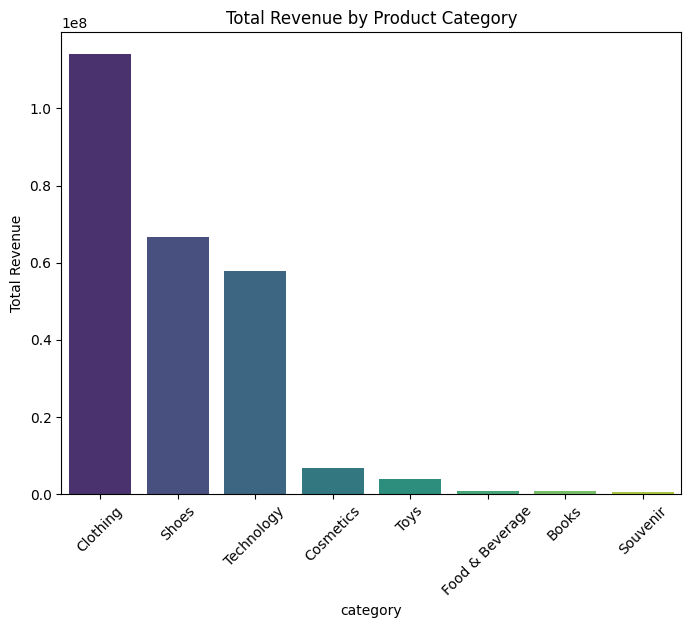

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

category_revenue = df.groupby('category')['total_revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='viridis')
plt.title('Total Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


##**2.Density Plot: Customer Spending Distribution**

<ipython-input-58-62856d845f8a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.groupby('customer_id')['total_revenue'].sum(), shade=True, color='purple')


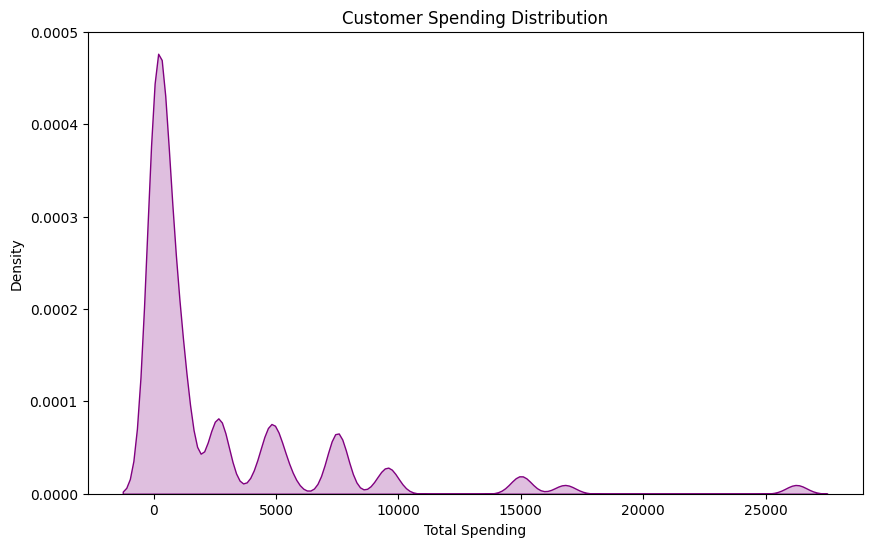

In [58]:
plt.figure(figsize=(10,6))
sns.kdeplot(df.groupby('customer_id')['total_revenue'].sum(), shade=True, color='purple')
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Density')
plt.show()


##**3. Pie Chart: Percentage of Revenue by Product Category**

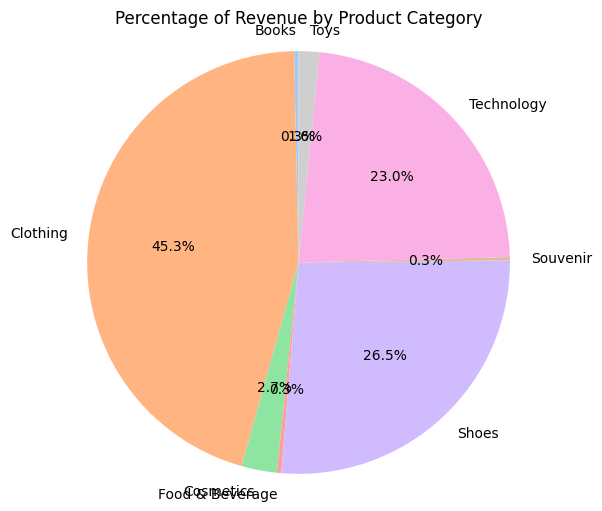

In [61]:
category_revenue = df.groupby('category')['total_revenue'].sum()

plt.figure(figsize=(6,6))
plt.pie(category_revenue, labels=category_revenue.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Percentage of Revenue by Product Category')
plt.axis('equal')
plt.show()

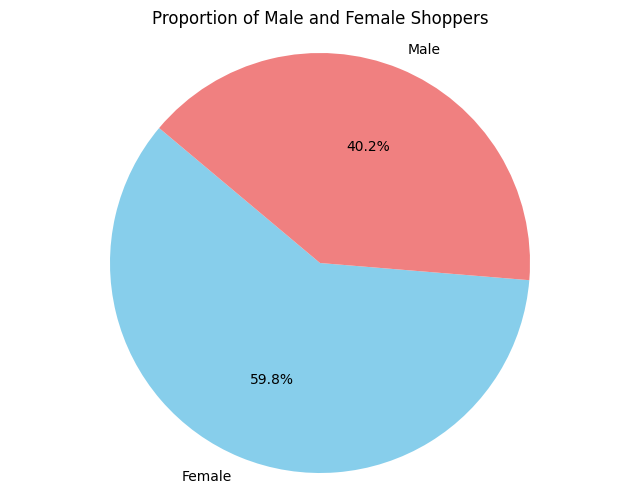

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
DataFrame = pd.read_csv('/content/sample_data/customer_shopping_data.csv')

# Count the number of male and female shoppers
gender_counts = df['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Male and Female Shoppers')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


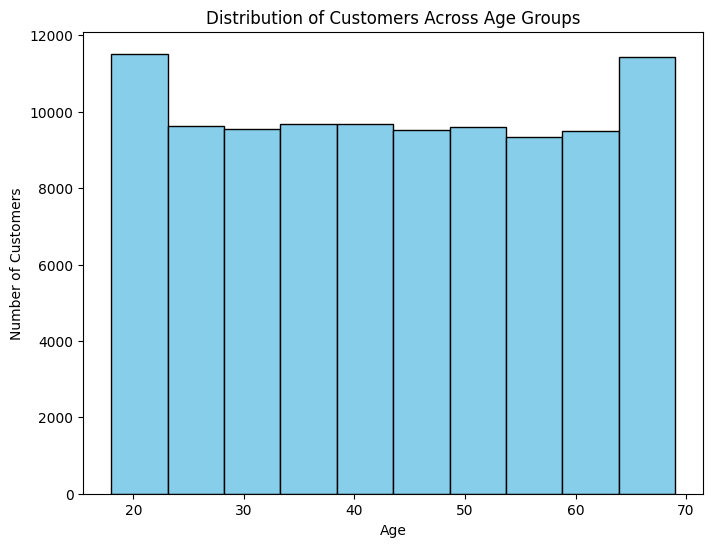

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/sample_data/customer_shopping_data.csv')

# Create a histogram for age distribution
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10, edgecolor='black', color='skyblue')

# Add titles and labels
plt.title('Distribution of Customers Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

# Show the histogram
plt.show()


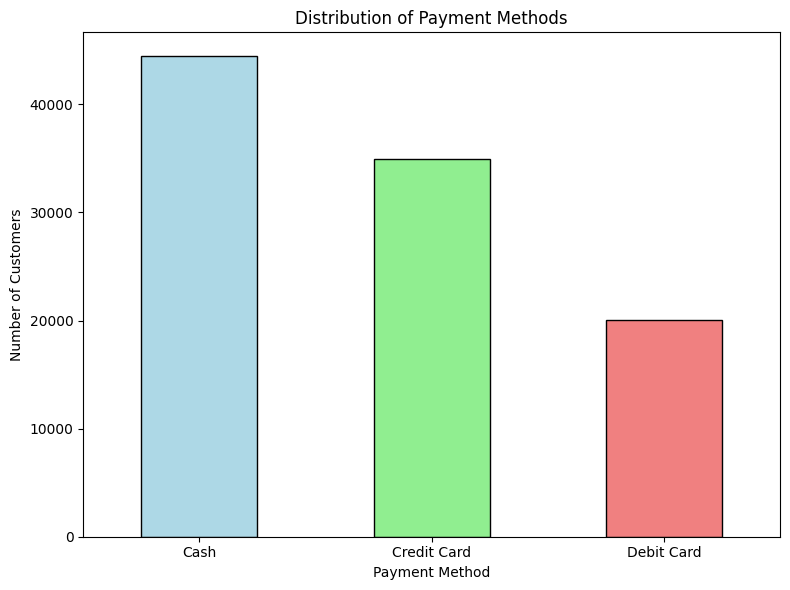

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/sample_data/customer_shopping_data.csv')

# Count the occurrences of each payment method
payment_counts = df['payment_method'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
payment_counts.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral'], edgecolor='black')

# Add titles and labels
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=0)

# Show the bar chart
plt.tight_layout()
plt.show()
